In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
from plot_utils import cool_savefig

In [3]:
small_batches = np.zeros((2,1500*500))
medium_batches = np.zeros((2,30*500))
large_batches = np.zeros((2,500))

In [4]:
from glob import glob

filenames = sorted(list(glob('concentration_estimates/*.npz')))
len(filenames)

500

In [5]:
for sim_num in range(500):
    npzfile = np.load(filenames[sim_num])
    
    small_batches[:,sim_num*1500:(sim_num+1)*1500] = npzfile['small_batches']
    medium_batches[:,sim_num*30:(sim_num+1)*30] = npzfile['medium_batches']
    large_batches[:,sim_num] = npzfile['whole_sim']

In [6]:
small_batches_densities = small_batches[0,:]
small_batches_compositions = small_batches[1,:]

medium_batches_densities = medium_batches[0,:]
medium_batches_compositions = medium_batches[1,:]

large_batches_densities = large_batches[0,:]
large_batches_compositions = large_batches[1,:]

In [7]:
print(np.mean(small_batches_densities < np.inf))
print(np.mean(small_batches_compositions < np.inf))

print(np.mean(medium_batches_densities < np.inf))
print(np.mean(medium_batches_compositions < np.inf))

print(np.mean(large_batches_densities < np.inf))
print(np.mean(large_batches_compositions < np.inf))

0.4952013333333333
0.9999946666666667
0.5011333333333333
1.0
0.542
1.0


In [8]:
def small_part(array, x): return array[array < x]
def finite_part(array): return small_part(array, np.inf)

In [9]:
from statsmodels.distributions.empirical_distribution import ECDF

In [10]:
def x_fmt(x, pos):
    return '$10^{}$'.format(x).replace('.0','').replace('.5', '')

In [11]:
def crest(index):
    return sns.color_palette("crest")[index]

def magma(index):
    return sns.color_palette("magma")[index]

In [12]:
small_ecdf = ECDF(small_batches_densities)
small_ecdf(10000000)
medium_ecdf = ECDF(medium_batches_densities)
large_ecdf = ECDF(large_batches_densities)

# Density Heterogeneity

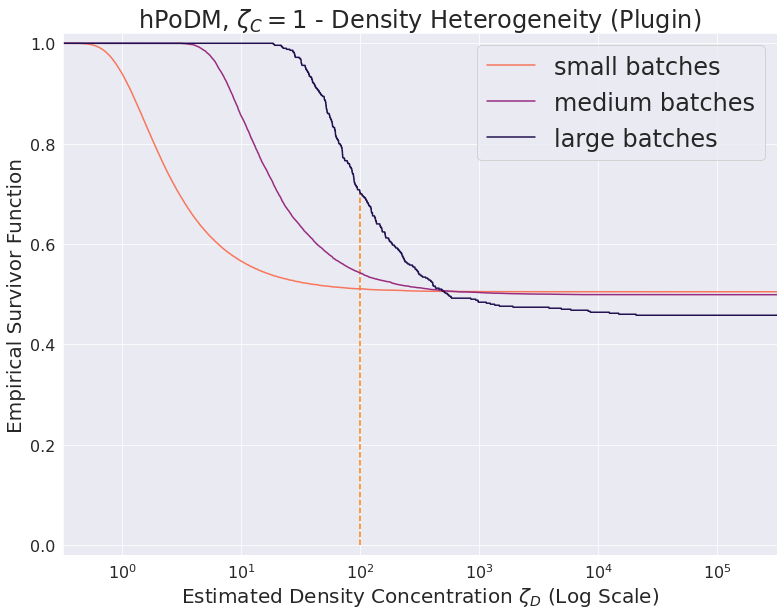

In [13]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8,9.6))
    xvals = np.logspace(start=-0.5, stop=5.5, num=10000)
    axis = sns.lineplot(x=np.log(xvals)/np.log(10), y=1.-small_ecdf(xvals), color=magma(4))
    sns.lineplot(x=np.log(xvals)/np.log(10), y=1.-medium_ecdf(xvals), color=magma(2))
    sns.lineplot(x=np.log(xvals)/np.log(10), y=1. - large_ecdf(xvals), color=magma(0))
    axis.legend(labels=["small batches", "medium batches", "large batches"], fontsize=24)
    axis.set_ylabel('Empirical Survivor Function', fontsize=20)
    axis.set_ylim((-0.02,1.02))
    plt.stem([2], [1.-large_ecdf(100)], markerfmt='', linefmt='C1--')
    axis.set_xlim((-0.5,5.5))
    axis.set_xlabel('Estimated Density Concentration $\zeta_D$ (Log Scale)', fontsize=20)
    axis.tick_params(labelsize=16)
    title = 'hPoDM, $\zeta_C=1$ - Density Heterogeneity (Plugin)'
    plt.title(title, fontsize=24)
    axis.xaxis.set_major_formatter(mtick.FuncFormatter(x_fmt))
    cool_savefig(title + ' survival')

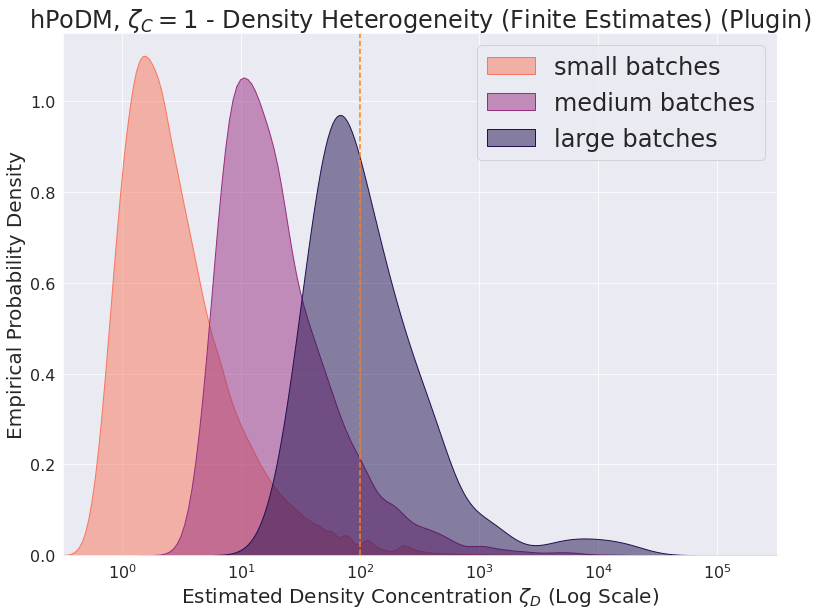

In [14]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8, 9.6))
    axis = sns.kdeplot(np.log(finite_part(small_batches_densities))/np.log(10), color=magma(4), fill=True, alpha=0.5)
    sns.kdeplot(np.log(finite_part(medium_batches_densities))/np.log(10), ax=axis, color=magma(2), fill=True, alpha=0.5)
    sns.kdeplot(np.log(finite_part(large_batches_densities))/np.log(10), ax=axis, color=magma(0), fill=True, alpha=0.5)
    axis.legend(labels=["small batches", "medium batches", "large batches"], fontsize=24)
    axis.xaxis.set_major_formatter(mtick.FuncFormatter(x_fmt))
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Density Concentration $\zeta_D$ (Log Scale)', fontsize=20)
    axis.tick_params(labelsize=16)
    axis.set_xlim((-0.5,5.5))
    axis.set_ylim((0,1.15))
    plt.stem([2], [1.2], markerfmt='', linefmt='C1--')
    title = 'hPoDM, $\zeta_C=1$ - Density Heterogeneity (Finite Estimates) (Plugin)'
    plt.title(title, fontsize=24)
    cool_savefig(title + ' kde')

that about exactly 50% of the density concentration estimators report infinity (so about 50/50 under vs over dispersion, which had been what I was expecting initially, since you know that's randomness centered around 0), and that of those that report a finite value have an extremely long tail, seems like a good sign for its accuracy. But it does not make for things which are visually compelling/clear visually via histograms

the survival function is not perfect but I do think it is essentially getting there in terms of quality of visualization

# Compositional Heterogeneity

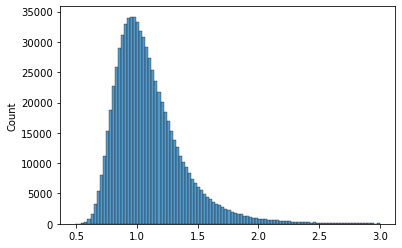

In [15]:
axis = sns.histplot(small_part(small_batches_compositions,3), bins=100)


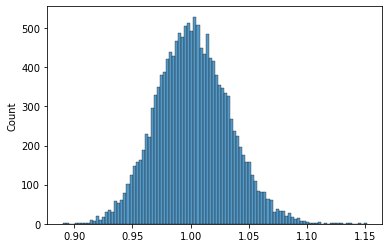

In [16]:
axis = sns.histplot(medium_batches_compositions, bins=100)

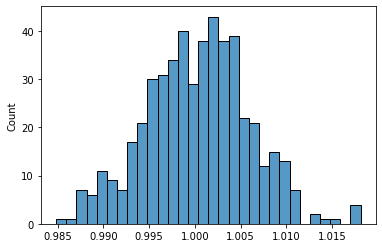

In [17]:
axis = sns.histplot(large_batches_compositions, bins=30)

these plots seem to show the plugin estimators displaying some sort of normality with increasing sample size, which I mean I guess might make sense, since they are functions of averages over increasingly large things or whatever, but anyway yeah you can clearly see that they are consistent and that the precision increases with the sample size. although maybe somehow showing them all side-by-side would be helpful

but you know while the first two have sufficient sample sizes to be able to demonstrate really pretty shaped curves, the last one arguably does not. I mean that's inevitable but still

anyway let's see if they can go one axis or not

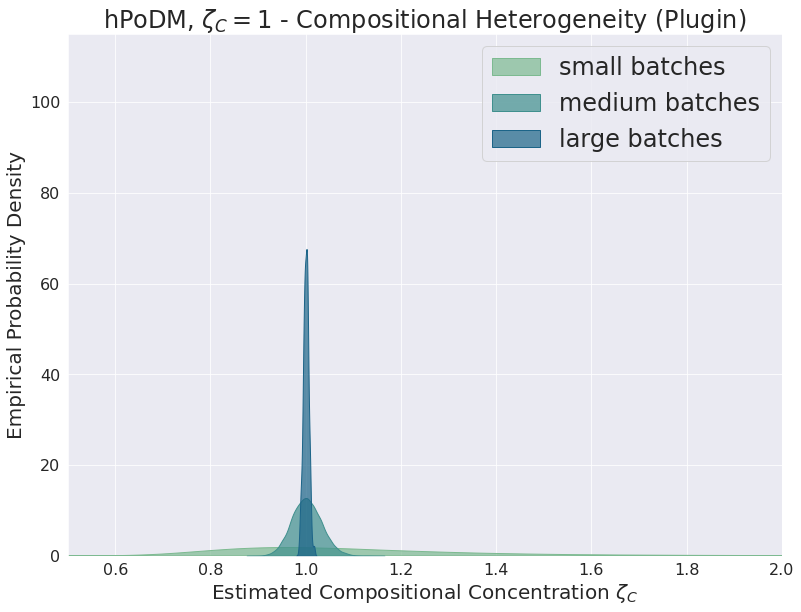

In [18]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8, 9.6))
    axis = sns.kdeplot(small_part(small_batches_compositions,3), color=crest(0), fill=True, alpha=0.7)
    sns.kdeplot(finite_part(medium_batches_compositions), ax=axis, color=crest(2), fill=True, alpha=0.7)
    sns.kdeplot(finite_part(large_batches_compositions), ax=axis, color=crest(4), fill=True, alpha=0.7)
    axis.legend(labels=["small batches", "medium batches", "large batches"], fontsize=24)
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlim((0.5,2))
    axis.set_ylim((0,115))
    axis.set_xlabel('Estimated Compositional Concentration $\zeta_C$', fontsize=20)
    axis.tick_params(labelsize=16)
    title = 'hPoDM, $\zeta_C=1$ - Compositional Heterogeneity (Plugin)'
    plt.title(title, fontsize=24)
    cool_savefig(title)

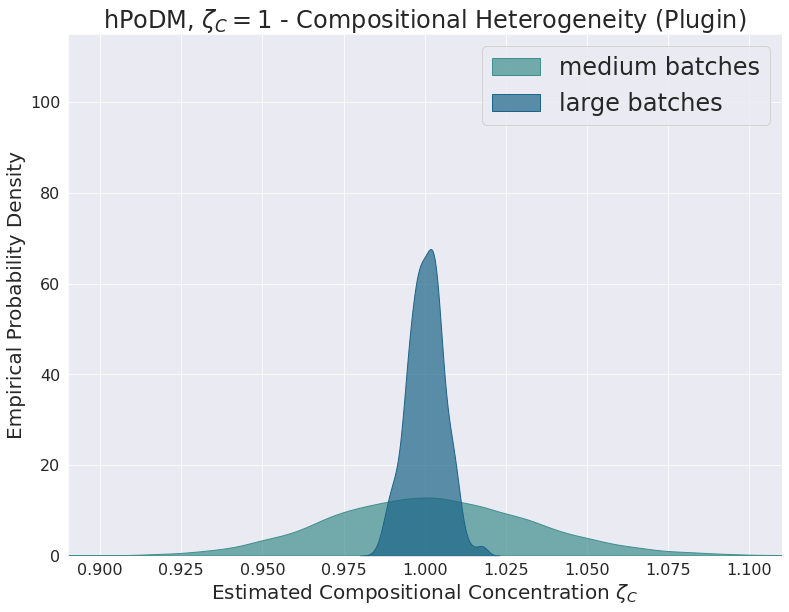

In [21]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8, 9.6))
    axis = sns.kdeplot(finite_part(medium_batches_compositions), color=crest(2), fill=True, alpha=0.7)
    sns.kdeplot(finite_part(large_batches_compositions), ax=axis, color=crest(4), fill=True, alpha=0.7)
    axis.legend(labels=["medium batches", "large batches"], fontsize=24)
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Compositional Concentration $\zeta_C$', fontsize=20)
    axis.set_xlim((0.89,1.11))
    axis.set_ylim((0,115))
    axis.tick_params(labelsize=16)
    title = 'hPoDM, $\zeta_C=1$ - Compositional Heterogeneity (Plugin)'
    plt.title(title, fontsize=24)
    cool_savefig(title + ' zoom')